In [1]:
#import libraries
import numpy as np, pandas as pd

#Supress warnings
import warnings
warnings.filterwarnings("ignore")

#import library for plots
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading companies file and fixing encoding
companies = pd.read_csv("companies.csv", encoding = 'latin-1')
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [3]:
#reading rounds2 file and fixing encoding
round2 = pd.read_csv('rounds2.csv', encoding = 'latin-1')
round2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [4]:
#unique companies in rounds2.csv
round2['company_permalink'].nunique()

90247

In [5]:
#unique companies in companies.csv
companies['permalink'].nunique()

66368

In [6]:
#converting company_permalinks to all lower as we can see in csv, some companies are repitative with CAPS.
round2['company_permalink'] = round2['company_permalink'].str.lower()

In [7]:
#unique companies in rounds2.csv
round2['company_permalink'].nunique()

66370

In [8]:
#converting permalinks to all lower
companies['permalink'] = companies['permalink'].str.lower()

In [9]:
#unique companies in comapnies.csv
companies['permalink'].nunique()

66368

#### Still diff of two, will fix special character

In [10]:
round2.company_permalink = round2.company_permalink.str.encode('latin-1').str.decode('ascii', 'ignore')

In [11]:
companies.permalink = companies.permalink.str.encode('latin-1').str.decode('ascii', 'ignore')

In [12]:
#unique companies in companies.csv
companies['permalink'].nunique()

66368

In [13]:
#unique companies in rounds2.csv
round2['company_permalink'].nunique()

66368

## Unique companies in both datasets's are 66368.

In [14]:
#merging the two dataframes
master_frame = pd.merge(round2, companies, how = 'left', left_on = 'company_permalink', right_on = 'permalink')

In [15]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
 6   permalink                114949 non-null  object 
 7   name                     114948 non-null  object 
 8   homepage_url             108815 non-null  object 
 9   category_list            111539 non-null  object 
 10  status                   114949 non-null  object 
 11  country_code             106271 non-null  object 
 12  state_code               104003 non-null  object 
 13  region                   104782 non-null  object 
 14  city

## Total observations are 114949.

# Funding Type Analysis

In [16]:
#count null values in master_frame
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

## remove null rows from relevent columns

In [17]:
master_frame = master_frame[~master_frame['raised_amount_usd'].isnull()]

In [18]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         66790
funded_at                      0
raised_amount_usd              0
permalink                      0
name                           1
homepage_url                4332
category_list               1044
status                         0
country_code                5851
state_code                  7604
region                      7048
city                        7045
founded_at                 15966
dtype: int64

In [19]:
#Removing row with null values
master_frame = master_frame[~master_frame['name'].isnull()]

In [20]:
master_frame = master_frame[~master_frame['country_code'].isnull()]

In [21]:
master_frame = master_frame[~master_frame['category_list'].isnull()]

In [22]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         61752
funded_at                      0
raised_amount_usd              0
permalink                      0
name                           0
homepage_url                3251
category_list                  0
status                         0
country_code                   0
state_code                  1731
region                      1184
city                        1181
founded_at                 13369
dtype: int64

In [23]:
master_frame.tail()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
114942,/organization/zzzzapp-com,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,NaN,01-11-2011,7000.0,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114943,/organization/zzzzapp-com,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,NaN,01-08-2013,33149.0,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114947,/organization/asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0,/organization/asys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [24]:
#removing rows with companies status as closed
master_frame = master_frame[~(master_frame['status'] == "closed")]

In [25]:
master_frame.tail()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
114942,/organization/zzzzapp-com,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,NaN,01-11-2011,7000.0,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114943,/organization/zzzzapp-com,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,NaN,01-08-2013,33149.0,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114947,/organization/asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0,/organization/asys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [26]:
master_frame.reset_index(inplace=True)

In [27]:
master_frame.head()

,index,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
3,6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
4,7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997


In [28]:
#Retaining the rows with required investment types
master_frame = master_frame[(master_frame['funding_round_type'] == 'venture') | (master_frame['funding_round_type'] == 'seed')
                            | (master_frame['funding_round_type'] == 'angel') | (master_frame['funding_round_type'] == 'private_equity')]

In [29]:
master_frame.head()

,index,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
5,8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997


In [30]:
#average investment amount for each of the four funding types in millions
round(master_frame.groupby('funding_round_type').raised_amount_usd.mean()/1000000,2)

funding_round_type
angel              1.00
private_equity    75.98
seed               0.76
venture           11.89
Name: raised_amount_usd, dtype: float64

#Plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. 

In [31]:
#for plotting graph
plot1 = pd.DataFrame({'total': round(master_frame.groupby('funding_round_type').raised_amount_usd.sum(),2),
                   'average': round(master_frame.groupby('funding_round_type').raised_amount_usd.mean()/1000000,2)})


In [32]:
plot1.head()

,total,average
funding_round_type,,
angel,3.948865e+09,1.00
private_equity,1.309067e+11,75.98
seed,1.506027e+10,0.76
venture,5.322308e+11,11.89


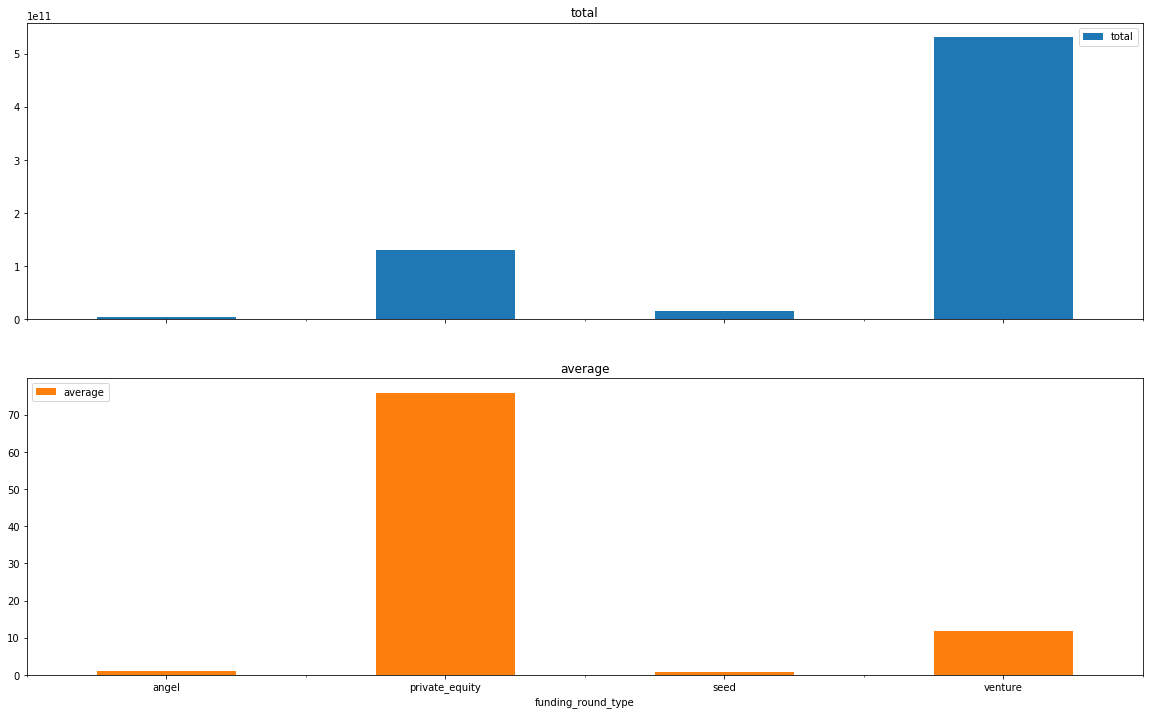

In [33]:
#plot 1 showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. 
axes = plot1.plot.bar(rot=0, subplots=True, figsize=(20,12))
axes[1].legend(loc=2) 
fig1 = plt.gcf()
plt.show()
fig1.savefig('plotOne.png', dpi=100)

## Venture funding is good for Spark fund

In [34]:
#removing other funding round types
master_frame = master_frame[master_frame['funding_round_type'] == 'venture']
master_frame.head()

,index,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
2,4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
7,10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
8,11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


In [35]:
#Total venture investment in all countries
master_frame['total_funding'] = master_frame['raised_amount_usd'].groupby(master_frame['country_code']).transform('sum')

In [36]:
master_frame.head()

,index,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,total_funding
0,0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,1.392025e+10
2,4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,3.864227e+10
5,8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,8.747168e+09
7,10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,3.983246e+11
8,11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,3.983246e+11


In [37]:
#Top 9 countries
#sorting by decending order
fundsum = master_frame.sort_values(by=['total_funding'], ascending=False)
total_fund_each_country = fundsum.groupby('total_funding').head(1)
top9 = total_fund_each_country.head(9)
top9

,index,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,total_funding
40941,56682,/organization/liveschool,/funding-round/7b17d43bda6a6a84cd906b5f212454cb,venture,A,31-01-2013,1650000.0,/organization/liveschool,LiveSchool,http://www.liveschoolinc.com,Apps|Education,operating,USA,TN,Nashville,Nashville,01-05-2011,3.983246e+11
67245,93059,/organization/space-star-technology,/funding-round/42dbbe05139a9ea9bde9406c2d8f1cf9,venture,NaN,26-10-2009,4250000.0,/organization/space-star-technology,Space Star Technology,http://www.spacestar.com.cn/en,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN,3.864227e+10
46616,64492,/organization/mtivity,/funding-round/9d24630a1605633ca3a87d80d26d335e,venture,C,23-07-2007,7080000.0,/organization/mtivity,Mtivity,http://www.mtivity.com,Enterprise Software,operating,GBR,H9,London,London,01-01-1999,1.814229e+10
82568,114584,/organization/zoomcar-india,/funding-round/a7cdd2e85e583a992e021b323b7374ad,venture,A,31-10-2014,8000000.0,/organization/zoomcar-india,ZoomCar,http://www.zoomcar.in,Automotive|Consumers|E-Commerce|Transportation,operating,IND,19,Bangalore,Bangalore,01-01-2012,1.392025e+10
53950,74641,/organization/perspecsys,/funding-round/b5376134e163a666ef0c45d266b06b99,venture,A,23-05-2011,8000000.0,/organization/perspecsys,Perspecsys,http://www.perspecsys.com,Cloud Security|CRM|Enterprise Software|IaaS|Pa...,acquired,CAN,ON,Toronto,Mississauga,01-01-2009,8.747168e+09
19856,27044,/organization/deolan,/funding-round/30ca5965f46022e0e560c47ccf012561,venture,NaN,01-07-2013,3216500.0,/organization/deolan,Deolan,http://www.deolan.com,Collaboration|Service Providers|Transportation,operating,FRA,97,NaN,NaN,07-06-2007,6.742609e+09
11027,15040,/organization/briefcam,/funding-round/659319893dd6d83f681ec0879f88ab86,venture,B,01-01-2011,5200000.0,/organization/briefcam,BriefCam,http://www.briefcam.com,Defense|Law Enforcement|Security|Software,operating,ISR,2,Tel Aviv,Modi'in,31-12-2007,6.484357e+09
73778,102410,/organization/traxpay,/funding-round/36088665772471b3c0d67cf537df078f,venture,NaN,26-06-2012,4000000.0,/organization/traxpay,Traxpay,http://www.traxpay.com,B2B|Business Services|Finance|Payments,acquired,DEU,5,Frankfurt,Frankfurt,01-01-2012,6.021103e+09
70459,97623,/organization/talknote,/funding-round/3a54080b8af6d1369e6b5c212cd477fe,venture,NaN,22-10-2013,2000000.0,/organization/talknote,Talknote,http://talknote.com,Social Media,operating,JPN,40,Tokyo,Tokyo,01-04-2010,3.156202e+09


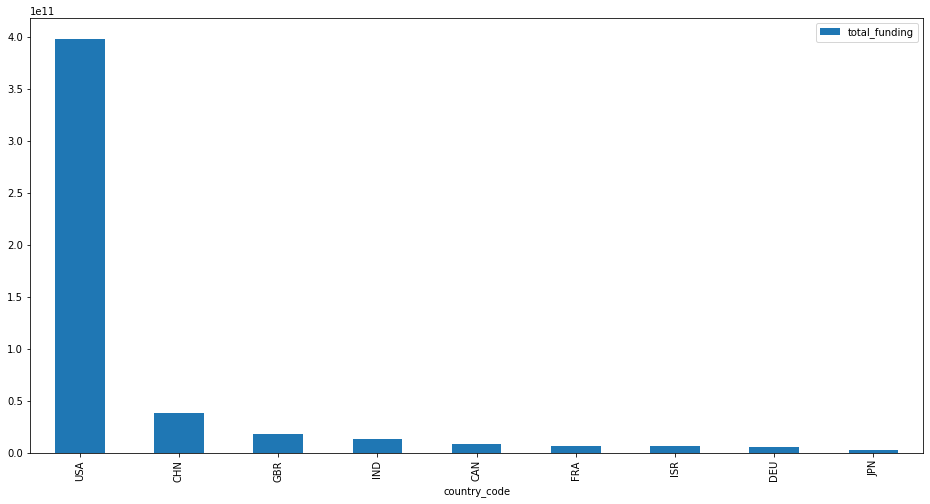

In [38]:
#Plot two showing the top 9 countries against the total amount of investments of funding type Venture
top9.plot(kind='bar',x='country_code',y='total_funding', figsize=(16,8))
fig1 = plt.gcf()
plt.show()
fig1.savefig('plotTwo.png', dpi=100)

## Top 3 english speaking countries with highest total funding - USA, GBR, IND

In [39]:
#retaining only required countries
master_frame = master_frame[(master_frame['country_code'] == 'USA') | (master_frame['country_code'] == 'GBR')
                                  | (master_frame['country_code'] == 'IND')]
master_frame.head()

,index,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,total_funding
0,0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,1.392025e+10
7,10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,3.983246e+11
8,11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,3.983246e+11
9,12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,3.983246e+11
15,22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,3.983246e+11


In [40]:
#Extracting  primary sector from column_list
master_frame['category_list'] = master_frame['category_list'].apply(lambda x: x.split('|')[0])
master_frame.head()

,index,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,total_funding
0,0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,1.392025e+10
7,10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,3.983246e+11
8,11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,3.983246e+11
9,12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,3.983246e+11
15,22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,3.983246e+11


In [41]:
#Reading mapping.csv file
mappings = pd.read_csv('mapping.csv')

In [42]:
mappings.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [43]:
#mapping primary sector and main sector
mapping = pd.melt(mappings, id_vars =['category_list'], value_vars =['Automotive & Sports','Cleantech / Semiconductors','Entertainment',
                                                             'Health','Manufacturing','News, Search and Messaging','Others',
                                                             'Social, Finance, Analytics, Advertising']) 
mapping = mapping.rename(columns = {"variable":"main_sector"})
mapping = mapping[~(mapping.value == 0)]
mapping = mapping.drop('value', axis = 1)
mapping.head()

,category_list,main_sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports


In [44]:
master_frame = master_frame.merge(mapping, how = 'left', on ='category_list')
master_frame.head()

,index,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,total_funding,main_sector
0,0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,1.392025e+10,Entertainment
1,10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,3.983246e+11,NaN
2,11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,3.983246e+11,NaN
3,12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,3.983246e+11,NaN
4,22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,3.983246e+11,"News, Search and Messaging"


In [45]:
#removing NaN values for main_sector
master_frame = master_frame[~(master_frame.main_sector.isnull())]
master_frame.head()

,index,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,total_funding,main_sector
0,0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,1.392025e+10,Entertainment
4,22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,3.983246e+11,"News, Search and Messaging"
5,28,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,09-10-2014,4000000.0,/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013,1.814229e+10,Others
6,34,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,A,16-02-2011,2520000.0,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,01-07-2010,3.983246e+11,"News, Search and Messaging"
7,38,/organization/1000museums-com,/funding-round/13be128d655076a025221d7fddc90d68,venture,NaN,14-10-2009,265940.0,/organization/1000museums-com,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008,3.983246e+11,"News, Search and Messaging"


##Sector Analysis 2

In [46]:
#Filtered on USA.
D1 = master_frame[(master_frame['country_code'] == 'USA') & (master_frame['raised_amount_usd'] >= 5000000) & 
                 (master_frame['raised_amount_usd'] <= 15000000)]
D1_group = D1[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'total_raised','count' : 'total_count'})
D1 = D1.merge(D1_group, how='left', on ='main_sector')
D1.head()

,index,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,...,status,country_code,state_code,region,city,founded_at,total_funding,main_sector,"(raised_amount_usd, total_raised)","(raised_amount_usd, total_count)"
0,22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,...,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,3.983246e+11,"News, Search and Messaging",1.281416e+10,1445
1,103,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,11999347.0,/organization/128-technology,128 Technology,http://www.128technology.com/,...,operating,USA,MA,Boston,Burlington,07-07-2014,3.983246e+11,Others,2.441447e+10,2732
2,110,/organization/1366-technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,C,15-10-2013,15000000.0,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,...,operating,USA,MA,Boston,Bedford,01-01-2007,3.983246e+11,Manufacturing,6.700079e+09,739
3,111,/organization/1366-technologies,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,C,09-04-2015,5000000.0,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,...,operating,USA,MA,Boston,Bedford,01-01-2007,3.983246e+11,Manufacturing,6.700079e+09,739
4,112,/organization/1366-technologies,/funding-round/786f61aa9866f4471151285f5c56be36,venture,A,03-02-2010,5150000.0,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,...,operating,USA,MA,Boston,Bedford,01-01-2007,3.983246e+11,Manufacturing,6.700079e+09,739


In [47]:
#Filtered by GBR
D2 = master_frame[(master_frame['country_code'] == 'GBR') & (master_frame['raised_amount_usd'] >= 500000) & 
             (master_frame['raised_amount_usd'] <= 15000000)]
D2_group = D2[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'total_raised','count' : 'total_count'})
D2 = D2.merge(D2_group, how='left', on ='main_sector')
D2.head()

,index,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,...,status,country_code,state_code,region,city,founded_at,total_funding,main_sector,"(raised_amount_usd, total_raised)","(raised_amount_usd, total_count)"
0,28,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,09-10-2014,4000000.0,/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,...,operating,GBR,H9,London,London,01-01-2013,1.814229e+10,Others,1.694276e+09,361
1,368,/organization/31dover,/funding-round/b95cb5a74632e596e19a845e405ef14b,venture,B,01-03-2014,2274716.0,/organization/31dover,31Dover,http://www.31dover.com,...,operating,GBR,H9,London,London,01-07-2012,1.814229e+10,Others,1.694276e+09,361
2,401,/organization/365scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,B,29-09-2014,5500000.0,/organization/365scores,365Scores,http://biz.365scores.com,...,operating,GBR,H9,London,London,01-01-2008,1.814229e+10,"Social, Finance, Analytics, Advertising",1.105466e+09,230
3,402,/organization/365scores,/funding-round/493f78ea0ca33cfac48a57b2351b154b,venture,A,28-01-2013,1200000.0,/organization/365scores,365Scores,http://biz.365scores.com,...,operating,GBR,H9,London,London,01-01-2008,1.814229e+10,"Social, Finance, Analytics, Advertising",1.105466e+09,230
4,665,/organization/4th-office,/funding-round/cb31013634b75ce3fd5f58de0c30ec6e,venture,B,03-12-2014,3607956.0,/organization/4th-office,4th Office,https://www.4thoffice.com,...,operating,GBR,NaN,NaN,NaN,NaN,1.814229e+10,Others,1.694276e+09,361


In [48]:
#Filtered by IND
D3 = master_frame[(master_frame['country_code'] == 'IND') & (master_frame['raised_amount_usd'] >= 500000) & 
             (master_frame['raised_amount_usd'] <= 15000000)]
D3_group = D3[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'total_raised','count' : 'total_count'})
D3 = D3.merge(D3_group, how='left', on ='main_sector')
D3.head()

,index,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,...,status,country_code,state_code,region,city,founded_at,total_funding,main_sector,"(raised_amount_usd, total_raised)","(raised_amount_usd, total_count)"
0,0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,...,operating,IND,16,Mumbai,Mumbai,NaN,1.392025e+10,Entertainment,3.307053e+08,54
1,227,/organization/21diamonds-india,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,C,15-11-2012,6369507.0,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,...,operating,IND,10,New Delhi,Gurgaon,01-06-2012,1.392025e+10,Others,1.120508e+09,185
2,265,/organization/247-learning-private,/funding-round/4cd5cd165bc869bc40705a9e4b626bee,venture,NaN,06-11-2007,4000000.0,/organization/247-learning-private,24x7 Learning,http://www.24x7learning.com,...,operating,IND,19,Bangalore,Bangalore,01-01-2001,1.392025e+10,Others,1.120508e+09,185
3,493,/organization/3dsoc,/funding-round/bbedf1410fddeed341018583bbd0ca1e,venture,A,01-12-2007,1240000.0,/organization/3dsoc,3DSoC,http://www.3dsoc.com,...,operating,IND,19,Bangalore,Bangalore,01-06-2006,1.392025e+10,Manufacturing,2.371600e+08,38
4,494,/organization/3dsoc,/funding-round/da8918e533a7caf0df0dc8d3f506c0f8,venture,B,01-08-2010,825000.0,/organization/3dsoc,3DSoC,http://www.3dsoc.com,...,operating,IND,19,Bangalore,Bangalore,01-06-2006,1.392025e+10,Manufacturing,2.371600e+08,38


In [49]:
#Count of investment in D1
D1['raised_amount_usd'].count()

10404

In [50]:
#Count of investment in D2, D3
print(D2['raised_amount_usd'].count())
print(D3['raised_amount_usd'].count())

1328
510


In [51]:
#Total amount of investment in D1,D2,D3
print(D1['raised_amount_usd'].sum())
print(D2['raised_amount_usd'].sum())
print(D3['raised_amount_usd'].sum())

93176222534.0
6538276929.0
3108552426.0


In [52]:
#top sectors and count of investments in D1
D1_group

raised_amount_usd            
                                             total_raised total_count
main_sector                                                          
Automotive & Sports                          1.374304e+09         157
Cleantech / Semiconductors                   1.972990e+10        2145
Entertainment                                4.503765e+09         520
Health                                       7.733830e+09         853
Manufacturing                                6.700079e+09         739
News, Search and Messaging                   1.281416e+10        1445
Others                                       2.441447e+10        2732
Social, Finance, Analytics, Advertising      1.590572e+10        1813

In [53]:
#top sectors and count of investments in D2
D2_group

raised_amount_usd            
                                             total_raised total_count
main_sector                                                          
Automotive & Sports                          2.007895e+08          30
Cleantech / Semiconductors                   1.415903e+09         284
Entertainment                                5.699740e+08         104
Health                                       3.100648e+08          71
Manufacturing                                4.601678e+08          87
News, Search and Messaging                   7.816365e+08         161
Others                                       1.694276e+09         361
Social, Finance, Analytics, Advertising      1.105466e+09         230

In [54]:
#top sectors and count of investments in D3
D3_group

raised_amount_usd            
                                             total_raised total_count
main_sector                                                          
Automotive & Sports                          1.444000e+08          17
Cleantech / Semiconductors                   2.081876e+08          37
Entertainment                                3.307053e+08          54
Health                                       1.993700e+08          32
Manufacturing                                2.371600e+08          38
News, Search and Messaging                   5.176476e+08          90
Others                                       1.120508e+09         185
Social, Finance, Analytics, Advertising      3.505742e+08          57

In [55]:
#D1, company with highest investment in Others sector
comp = D1[D1['main_sector']=='Others']
company = comp.pivot_table(values = 'raised_amount_usd', index = 'name', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head())

                     raised_amount_usd
name                                  
Virtustream                 64300000.0
Capella Photonics           54968051.0
AirTight Networks           54201907.0
deCarta                     52100000.0
Black Duck Software         51000000.0


In [56]:
#D1, company with highest investment in 2nd best sector
comp = D1[D1['main_sector']=='Cleantech / Semiconductors']
company = comp.pivot_table(values = 'raised_amount_usd', index = 'name', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head())

               raised_amount_usd
name                            
Biodesix              75300000.0
Tigo Energy           68739496.0
ForSight Labs         61300001.0
Rheonix               56124758.0
SCIenergy             55375423.0


In [57]:
#D2, company with highest investment in Others sector
comp = D2[D2['main_sector']=='Others']
company = comp.pivot_table(values = 'raised_amount_usd', index = 'name', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head())

                         raised_amount_usd
name                                      
Electric Cloud                  45842999.0
SenSage                         36250000.0
SilverRail Technologies         29000000.0
Tribold                         28120000.0
OpenCloud                       27972766.0


In [58]:
#D2, company with highest investment in 2nd Best sector
comp = D2[D2['main_sector']=='Cleantech / Semiconductors']
company = comp.pivot_table(values = 'raised_amount_usd', index = 'name', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head())

                              raised_amount_usd
name                                           
EUSA Pharma                          35600000.0
F-star Biotechnology Limited         33557006.0
Horizon Discovery                    31353719.0
Elixent                              25000000.0
Oxford Photovoltaics                 23010301.0


In [59]:
#D3, company with highest investment in Others sector
comp = D3[D3['main_sector']=='Others']
company = comp.pivot_table(values = 'raised_amount_usd', index = 'name', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head())

                   raised_amount_usd
name                                
FirstCry.com              39000000.0
Myntra                    38000000.0
CommonFloor               32900000.0
Pepperfry.com             28000000.0
ItzCash Card Ltd.         25000000.0


In [60]:
#D3, company with highest investment in 2nd best sector
comp = D3[D3['main_sector']=='News, Search and Messaging']
company = comp.pivot_table(values = 'raised_amount_usd', index = 'name', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head())

             raised_amount_usd
name                          
GupShup             33000000.0
IMImobile           26000000.0
SMS GupShup         22000000.0
Roadrunnr           21000000.0
hike                21000000.0


#End of file
